In [1]:
from IPython.display import clear_output
import SALib
from SALib.sample import saltelli
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from model import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
import time
import copy
%matplotlib inline

In [11]:
problem = {
    'num_vars': 6,
    'names': [
     'max_eff', 
     'eutax',
     'neighbor_influence',
     'tax_influence',
     'member_trade_multiplier',
     'tax_distribution'],
    #'bounds': [[0, 2], [0.1, 0.6], [0, 0.2], [0, 0.2], [0.9, 2], [0.8, 1.2]]
    'bounds': [[0, 5], [0, 1], [0, 1], [0, 1], [0.1, 5], [0.1, 3]]
}

#international_trade, max_eff, eutax, neighbor_influence,
#tax_influence, member_trade_multiplier, randomness, eu_strategy):
# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 1
max_steps = 5
distinct_samples = 800

# Set the outputs

# We get all our samples here
param_values = saltelli.sample(problem, distinct_samples, calc_second_order= True)
# READ NOTE BELOW CODE

count = 0
samples = pd.DataFrame(data=param_values,
                       columns=[ 'max_eff', 'eutax','neighbor_influence',
                                'tax_influence','member_trade_multiplier','tax_distribution'])

samples.to_csv('out.csv')

In [6]:
samples

,max_eff,eutax,neighbor_influence,tax_influence,member_trade_multiplier,tax_distribution
0,1.098633,0.096680,0.518555,0.676758,1.473340,2.730957
1,0.229492,0.096680,0.518555,0.676758,1.473340,2.730957
2,1.098633,0.899414,0.518555,0.676758,1.473340,2.730957
3,1.098633,0.096680,0.500977,0.676758,1.473340,2.730957
4,1.098633,0.096680,0.518555,0.069336,1.473340,2.730957
...,...,...,...,...,...,...
6395,0.646973,0.998535,0.230957,0.917480,0.643115,0.681982
6396,0.646973,0.998535,0.294434,0.785645,0.643115,0.681982
6397,0.646973,0.998535,0.294434,0.917480,4.935400,0.681982
6398,0.646973,0.998535,0.294434,0.917480,0.643115,2.746533


In [7]:
problem = {
    'num_vars': 6,
    'names': [
     'max_eff', 
     'eutax',
     'neighbor_influence',
     'tax_influence',
     'member_trade_multiplier',
     'tax_distribution'],
    'bounds': [[0, 2], [0.1, 0.6], [0, 0.2], [0, 0.2], [0.9, 2], [0.8, 1.2]]
}
data = pd.read_csv('data_int_on.csv')
print(data.columns)
#data = data['Run'].unique()

data = data.loc[data['international_trade'] == True]
data = data.drop_duplicates(subset=['Run'])
data['gini_coefficient'] = np.where(data['gini_coefficient'] == 'nan', 1, data['gini_coefficient'])
#data['gini_coefficient'] = data['gini_coefficient'].div(2)
np.where(data['gini_coefficient'] == nan: )
data.reindex()

Index(['Run', 'international_trade', 'max_eff', 'eutax', 'neighbor_influence',
       'tax_influence', 'member_trade_multiplier', 'tax_distribution',
       'member_count', 'other_count', 'average_cooperativeness',
       'other_wealth', 'total_wealth', 'member_wealth', 'other_eff',
       'total_eff', 'member_eff', 'gini_coefficient',
       'stdev_agent_cooperativeness'],
      dtype='object')


,Run,international_trade,max_eff,eutax,neighbor_influence,tax_influence,member_trade_multiplier,tax_distribution,member_count,other_count,average_cooperativeness,other_wealth,total_wealth,member_wealth,other_eff,total_eff,member_eff,gini_coefficient,stdev_agent_cooperativeness
0,4872,True,2.028809,0.101074,0.676270,0.004395,2.839502,1.749658,203,117,0.266017,3.240900e+04,4.670000e+31,7.350000e+31,2.103845,2.058586,2.032500,0.991257,0.961135
1,12789,True,3.186035,0.090332,0.816895,0.762207,4.437744,2.995752,296,24,0.149722,2.457690e+13,2.460000e+71,2.660000e+71,2.333395,2.957793,3.008420,0.994405,0.332843
2,3654,True,4.245605,0.653809,0.561035,0.029785,3.078760,0.407275,257,63,0.604668,5.591755e+04,6.604301e+04,6.852513e+04,4.222741,3.549232,3.384131,0.083522,0.785504
3,7308,True,4.079590,0.315918,0.789551,0.703613,3.241455,2.372705,3,317,-0.985648,3.790000e+16,2.130000e+103,2.280000e+105,3.318731,3.331854,4.718530,0.996875,0.150990
4,7917,True,3.918457,0.213379,0.229004,0.100098,4.389893,2.072510,208,112,0.235562,6.844052e+04,1.690000e+88,2.600000e+88,3.381222,3.360078,3.348692,0.993873,0.906689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,12784,True,3.186035,0.090332,0.270996,0.784668,4.509521,2.698389,1,319,-0.993750,4.140611e+04,4.171280e+04,1.395462e+05,2.950828,2.976743,11.243717,0.280027,0.111629
13996,12785,True,3.186035,0.834473,0.816895,0.784668,4.509521,2.698389,3,317,-0.986154,1.154702e+10,8.890000e+278,9.480000e+280,2.668430,2.676314,3.509419,0.996875,0.146764
13997,12786,True,3.186035,0.834473,0.270996,0.762207,4.509521,2.698389,1,319,-0.993750,3.979450e+04,4.008258e+04,1.319794e+05,2.820635,2.844365,10.414530,0.269905,0.111629
13998,12787,True,3.186035,0.834473,0.270996,0.784668,4.437744,2.698389,1,319,-0.993750,3.898922e+04,3.937593e+04,1.627345e+05,2.744854,2.770012,10.795393,0.291184,0.111629


In [8]:
print(data.columns)
for val in data.columns[8:]:
    print(val)

Index(['Run', 'international_trade', 'max_eff', 'eutax', 'neighbor_influence',
       'tax_influence', 'member_trade_multiplier', 'tax_distribution',
       'member_count', 'other_count', 'average_cooperativeness',
       'other_wealth', 'total_wealth', 'member_wealth', 'other_eff',
       'total_eff', 'member_eff', 'gini_coefficient',
       'stdev_agent_cooperativeness'],
      dtype='object')
member_count
other_count
average_cooperativeness
other_wealth
total_wealth
member_wealth
other_eff
total_eff
member_eff
gini_coefficient
stdev_agent_cooperativeness


In [9]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        print('S' + i)
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

member_count
Parameter S1 S1_conf ST ST_conf
max_eff -0.010774 0.087173 0.990192 0.072792
eutax -0.009985 0.085896 0.994625 0.072452
neighbor_influence 0.012950 0.089416 1.018869 0.075073
tax_influence -0.058963 0.088972 0.990002 0.072121
member_trade_multiplier -0.016703 0.088772 1.079533 0.076676
tax_distribution -0.061676 0.084278 0.992005 0.072349

Parameter_1 Parameter_2 S2 S2_conf
max_eff eutax -0.002926 0.122002
max_eff neighbor_influence -0.017543 0.127946
max_eff tax_influence 0.025004 0.122299
max_eff member_trade_multiplier 0.047659 0.127731
max_eff tax_distribution 0.058447 0.122638
eutax neighbor_influence -0.041219 0.125499
eutax tax_influence 0.047766 0.123369
eutax member_trade_multiplier -0.014228 0.122895
eutax tax_distribution 0.151210 0.118008
neighbor_influence tax_influence -0.039003 0.124658
neighbor_influence member_trade_multiplier 0.018854 0.123110
neighbor_influence tax_distribution 0.005039 0.121554
tax_influence member_trade_multiplier 0.041155 0.124296
tax

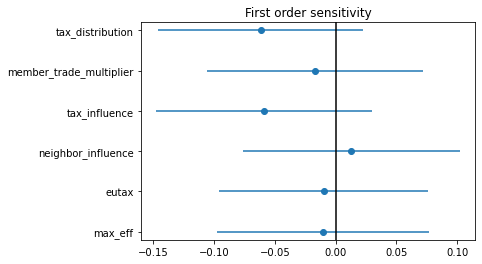

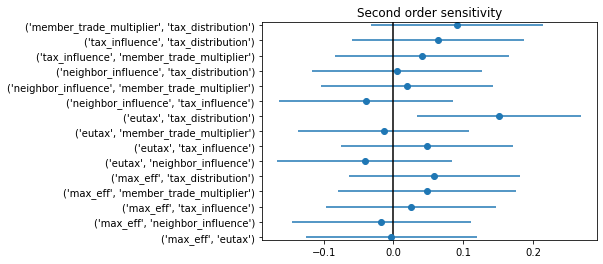

ST


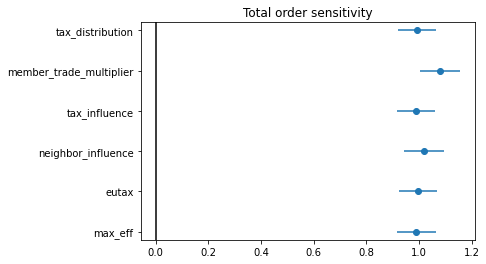

other_count
Parameter S1 S1_conf ST ST_conf
max_eff -0.010774 0.086359 0.990192 0.071576
eutax -0.009985 0.085419 0.994625 0.072076
neighbor_influence 0.012950 0.087887 1.018869 0.074683
tax_influence -0.058963 0.088492 0.990002 0.072421
member_trade_multiplier -0.016703 0.088771 1.079533 0.077437
tax_distribution -0.061676 0.084915 0.992005 0.073216

Parameter_1 Parameter_2 S2 S2_conf
max_eff eutax -0.002926 0.121244
max_eff neighbor_influence -0.017543 0.125685
max_eff tax_influence 0.025004 0.120961
max_eff member_trade_multiplier 0.047659 0.126981
max_eff tax_distribution 0.058447 0.123291
eutax neighbor_influence -0.041219 0.124811
eutax tax_influence 0.047766 0.123377
eutax member_trade_multiplier -0.014228 0.122508
eutax tax_distribution 0.151210 0.117406
neighbor_influence tax_influence -0.039003 0.123033
neighbor_influence member_trade_multiplier 0.018854 0.121096
neighbor_influence tax_distribution 0.005039 0.121816
tax_influence member_trade_multiplier 0.041155 0.124434
tax_

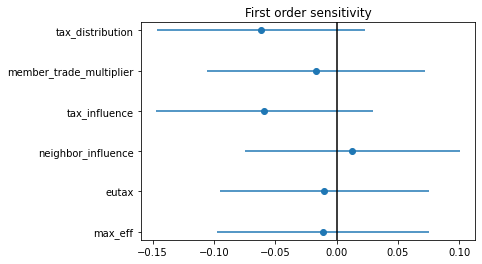

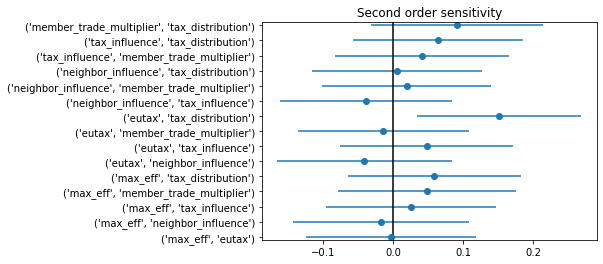

ST


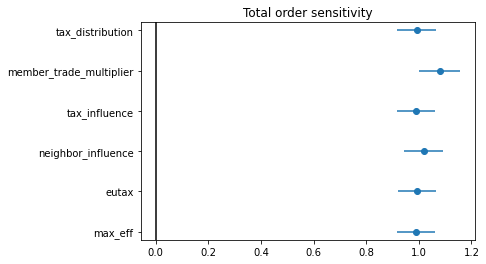

average_cooperativeness
Parameter S1 S1_conf ST ST_conf
max_eff -0.012560 0.084792 0.992460 0.074896
eutax -0.003154 0.083435 1.001084 0.073982
neighbor_influence 0.018488 0.088125 1.028126 0.078687
tax_influence -0.047766 0.085759 1.021034 0.075875
member_trade_multiplier -0.019354 0.086191 1.079944 0.080513
tax_distribution -0.056178 0.085487 1.003557 0.075622

Parameter_1 Parameter_2 S2 S2_conf
max_eff eutax -0.001098 0.119071
max_eff neighbor_influence -0.011045 0.125924
max_eff tax_influence 0.018730 0.119094
max_eff member_trade_multiplier 0.056244 0.125404
max_eff tax_distribution 0.070950 0.120508
eutax neighbor_influence -0.052791 0.122332
eutax tax_influence 0.031860 0.121794
eutax member_trade_multiplier -0.009630 0.120424
eutax tax_distribution 0.148800 0.116897
neighbor_influence tax_influence -0.044456 0.121127
neighbor_influence member_trade_multiplier 0.017076 0.119743
neighbor_influence tax_distribution -0.004998 0.122170
tax_influence member_trade_multiplier 0.038554 

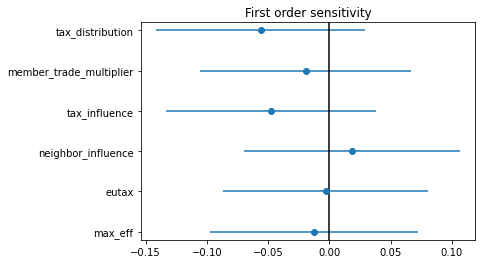

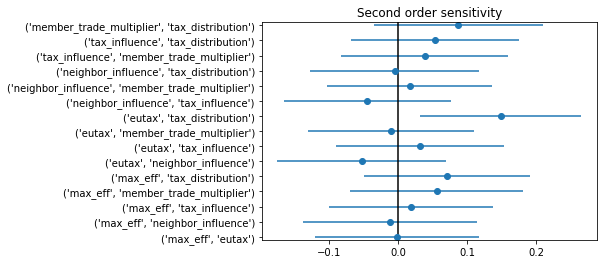

ST


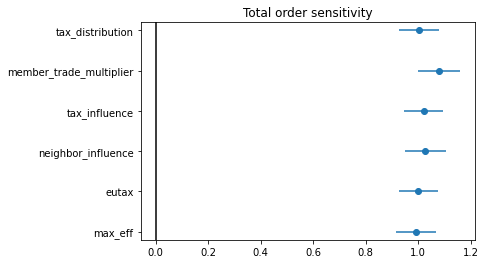

other_wealth
Parameter S1 S1_conf ST ST_conf
max_eff nan nan nan nan
eutax nan nan nan nan
neighbor_influence nan nan nan nan
tax_influence nan nan nan nan
member_trade_multiplier nan nan nan nan
tax_distribution nan nan nan nan

Parameter_1 Parameter_2 S2 S2_conf
max_eff eutax nan nan
max_eff neighbor_influence nan nan
max_eff tax_influence nan nan
max_eff member_trade_multiplier nan nan
max_eff tax_distribution nan nan
eutax neighbor_influence nan nan
eutax tax_influence nan nan
eutax member_trade_multiplier nan nan
eutax tax_distribution nan nan
neighbor_influence tax_influence nan nan
neighbor_influence member_trade_multiplier nan nan
neighbor_influence tax_distribution nan nan
tax_influence member_trade_multiplier nan nan
tax_influence tax_distribution nan nan
member_trade_multiplier tax_distribution nan nan
{'S1': array([nan, nan, nan, nan, nan, nan]), 'S1_conf': array([nan, nan, nan, nan, nan, nan]), 'ST': array([nan, nan, nan, nan, nan, nan]), 'ST_conf': array([nan, nan, nan, n

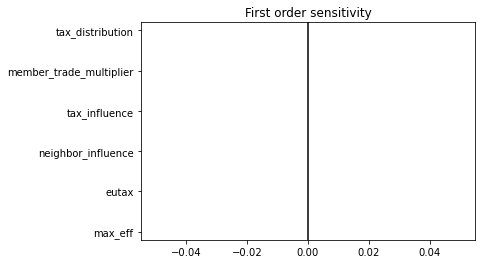

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (15).

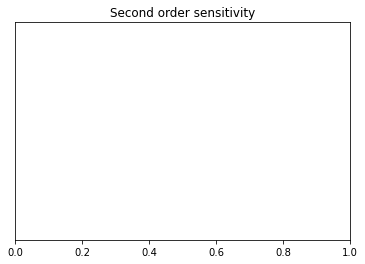

In [12]:
for col_name in data.columns[8:]:
    print(col_name)
    S_i = sobol.analyze(problem, data[col_name].values, print_to_console=True, calc_second_order=True, num_resamples= 6400)
    print(S_i)

    for Si in [S_i]:
        # First order
        plot_index(Si, problem['names'], '1', 'First order sensitivity')
        plt.show()
        # Second order
        plot_index(Si, problem['names'], '2', 'Second order sensitivity')
        plt.show()
        # Total order
        plot_index(Si, problem['names'], 'T', 'Total order sensitivity')
        plt.show()